In [2]:
import math
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

# from tqdm import tqdm

%matplotlib inline

In [3]:
def plot_images_for_filenames(filenames, labels, rows=4):
    imgs = [plt.imread(f'./data/train/{filename}') for filename in filenames]
    
    return plot_images(imgs, labels, rows)
    
        
def plot_images(imgs, labels, rows=4):
    # Set figure to 13 inches x 8 inches
    figure = plt.figure(figsize=(13, 8))

    cols = len(imgs) // rows + 1

    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if labels:
            subplot.set_title(labels[i], fontsize=16)
        plt.imshow(imgs[i], cmap='gray')

In [4]:
train_df = pd.read_csv('./data/train.csv')
train_df.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


### Get image size info (aspect ratio, etc.)

In [9]:
def get_img_size_by_name(img_name):
    img = plt.imread(f'./data/train/'+img_name)
    return img.shape

In [10]:
train_df['size'] = train_df['Image'].map(lambda s: get_img_size_by_name(s))
train_df['height'] = train_df['size'].map(lambda x: x[0])
train_df['width'] = train_df['size'].map(lambda x: x[1])
train_df['aspect'] = train_df['size'].map(lambda x: float(x[0]/x[1]))
# RGB color: 1, Gray-scale: 0
train_df['color'] = train_df['size'].map(lambda x: len(x)-2)
train_df['square'] = train_df['size'].map(lambda x: x[0]==x[1])

In [11]:
train_df.head()

,Image,Id,size,height,width,aspect,color,square
0,00022e1a.jpg,w_e15442c,"(500, 699)",500,699,0.715308,0,False
1,000466c4.jpg,w_1287fbc,"(700, 1050, 3)",700,1050,0.666667,1,False
2,00087b01.jpg,w_da2efe0,"(368, 1050, 3)",368,1050,0.350476,1,False
3,001296d5.jpg,w_19e5482,"(170, 397, 3)",170,397,0.428212,1,False
4,0014cfdf.jpg,w_f22f3e3,"(398, 700)",398,700,0.568571,0,False


In [12]:
train_df.to_pickle('train_df.pkl')

In [13]:
train_df.square.value_counts()

False    9849
True        1
Name: square, dtype: int64

In [14]:
train_df[train_df.square==True]

,Image,Id,size,height,width,aspect,color,square
557,0dd507d3.jpg,w_fd07344,"(299, 299, 3)",299,299,1.0,1,True


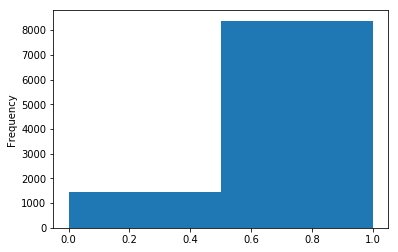

In [15]:
train_df.color.plot.hist(bins=2)

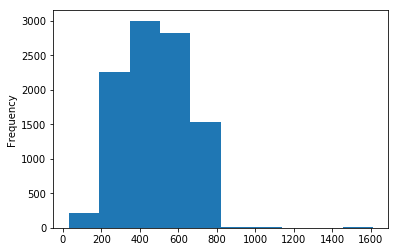

In [16]:
train_df.height.plot.hist(bins=10)

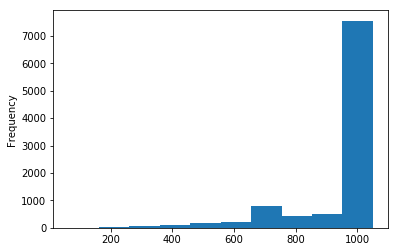

In [17]:
train_df.width.plot.hist(bins=10)

(0.3, 0.7)

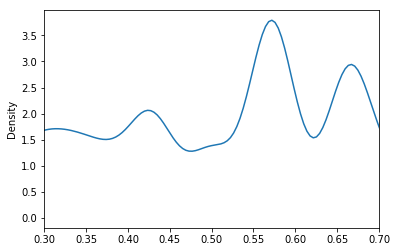

In [18]:
train_df.aspect.plot.kde()
plt.xlim((0.3,0.7))

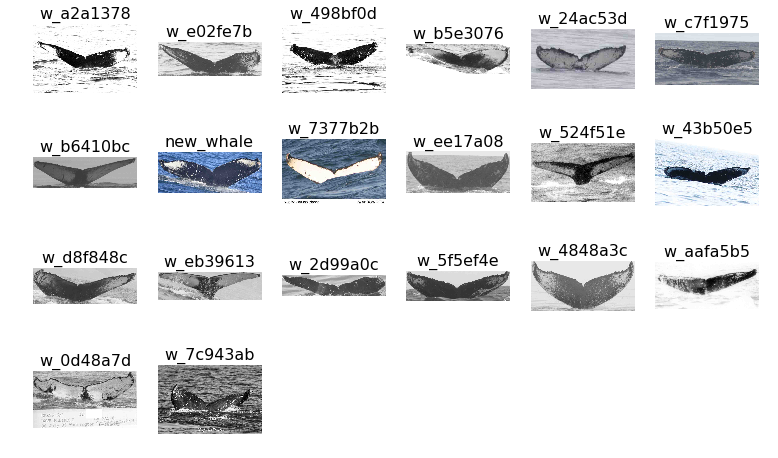

In [6]:
rand_rows = train_df.sample(frac=1.)[:20]
imgs = list(rand_rows['Image'])
labels = list(rand_rows['Id'])

plot_images_for_filenames(imgs, labels)

In [8]:
num_categories = len(train_df['Id'].unique())
     
print(f'Number of categories: {num_categories}')


Number of categories: 4251


In [9]:
size_buckets = Counter(train_df['Id'].value_counts().values)

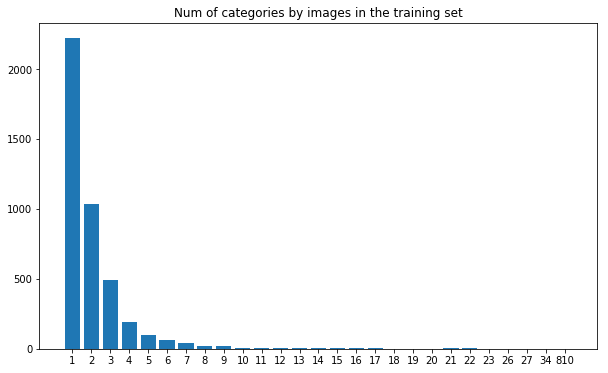

In [10]:
plt.figure(figsize=(10, 6))

plt.bar(range(len(size_buckets)), list(size_buckets.values())[::-1], align='center')
plt.xticks(range(len(size_buckets)), list(size_buckets.keys())[::-1])
plt.title("Num of categories by images in the training set")

plt.show()


In [11]:
train_df['Id'].value_counts().head(3)


new_whale    810
w_1287fbc     34
w_98baff9     27
Name: Id, dtype: int64

In [12]:
total = len(train_df['Id'])
print(f'Total images in training set {total}')

Total images in training set 9850


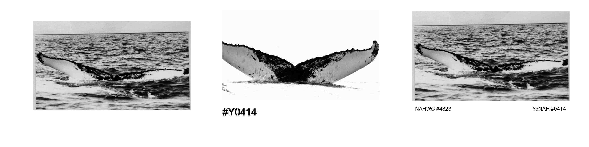

In [8]:
w_1287fbc = train_df[train_df['Id'] == 'w_0bbb3de']
plot_images_for_filenames(list(w_1287fbc['Image']), None, rows=1)


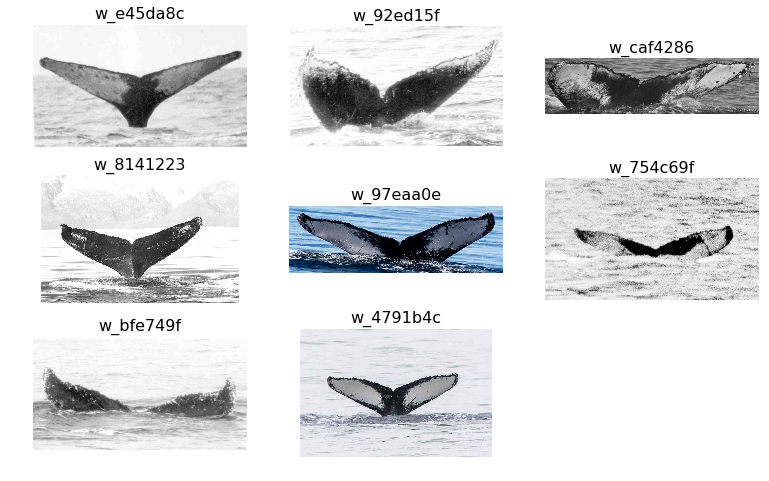

In [14]:
one_image_ids = train_df['Id'].value_counts().tail(8).keys()
one_image_filenames = []
labels = []
for i in one_image_ids:
    one_image_filenames.extend(list(train_df[train_df['Id'] == i]['Image']))
    labels.append(i)
    
plot_images_for_filenames(one_image_filenames, labels, rows=3)


In [15]:
# def is_grey_scale(img_path):
#     """Thanks to https://stackoverflow.com/questions/23660929/how-to-check-whether-a-jpeg-image-is-color-or-gray-scale-using-only-python-stdli"""
#     im = Image.open(img_path).convert('RGB')
#     w,h = im.size
#     for i in range(w):
#         for j in range(h):
#             r,g,b = im.getpixel((i,j))
#             if r != g != b: return False
#     return True

In [18]:
# is_grey = [is_grey_scale(f'./data/train/{i}') for i in train_df['Image'].sample(frac=0.1)]
# grey_perc = round(sum([i for i in is_grey]) / len([i for i in is_grey]) * 100, 2)
# print(f"% of grey images: {grey_perc}")


In [27]:
count_df = train_df.groupby("Id",as_index = False)["Image"].count()
count_df = count_df.rename(columns = {"Image":"Counts"})
count_df = count_df.sort_values("Counts",ascending = False)


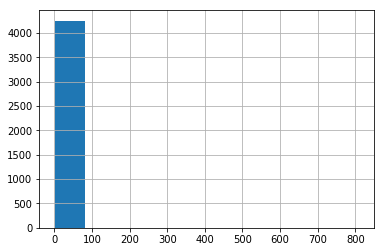

In [28]:
count_df.Counts.hist()